In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the datasets

In [24]:
transactions_df = pd.read_csv('Transactions.csv')
products_df = pd.read_csv('Products.csv')
customers_df = pd.read_csv('Customers.csv')

Merge datasets for comprehensive analysis

In [25]:
transactions_merged = transactions_df.merge(products_df, on='ProductID')
transactions_merged = transactions_merged.merge(customers_df, on='CustomerID')

Convert date columns to datetime format

In [26]:
transactions_merged['TransactionDate'] = pd.to_datetime(transactions_merged['TransactionDate'])
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

Task 1: Exploratory Data Analysis (EDA)



In [27]:
# Summary statistics
summary_stats = transactions_merged.describe()

# Top-performing products by total sales
product_sales = transactions_merged.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)

# Transactions by region
region_sales = transactions_merged.groupby('Region')['TotalValue'].sum()

# Monthly sales trend
transactions_merged['MonthYear'] = transactions_merged['TransactionDate'].dt.to_period('M')
monthly_sales = transactions_merged.groupby('MonthYear')['TotalValue'].sum()

# Customer acquisition over time
customer_acquisition = customers_df['SignupDate'].dt.to_period('M').value_counts().sort_index()

# Analysis of product categories
category_sales = transactions_merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

Task 2: Business Insights
(in form of plots and graphs)

*The top-selling product generates significantly higher revenue compared to others, indicating its popularity and potential for targeted promotions.*

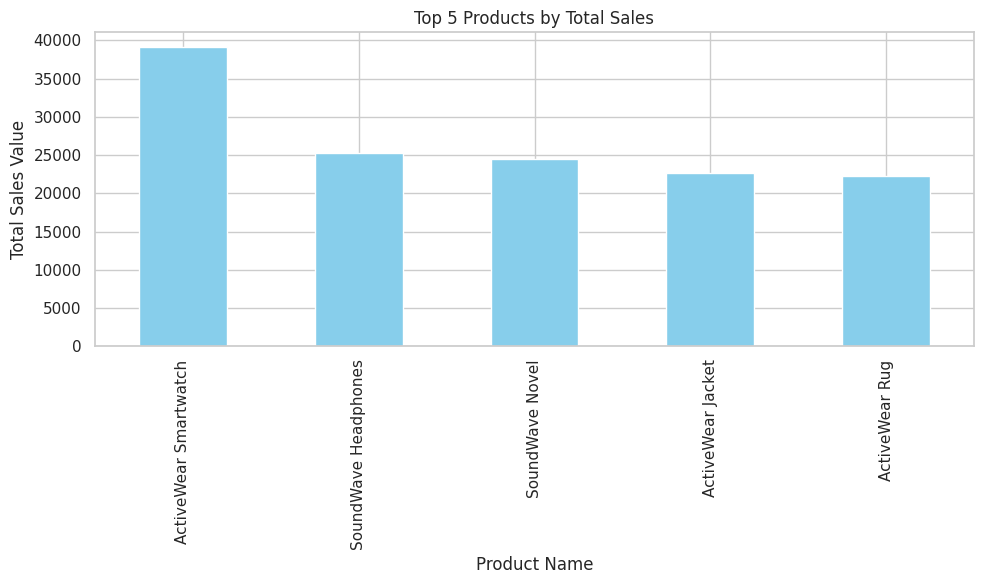

In [28]:
plt.figure(figsize=(10, 6))
plt.title('Top 5 Products by Total Sales')
product_sales.head(5).plot(kind='bar', color='skyblue')
plt.ylabel('Total Sales Value')
plt.xlabel('Product Name')
plt.tight_layout()
# plt.savefig('top_products.png')
plt.show()
# plt.clf()

*The region contributing the most to sales provides an opportunity for focused marketing to maximize returns.*

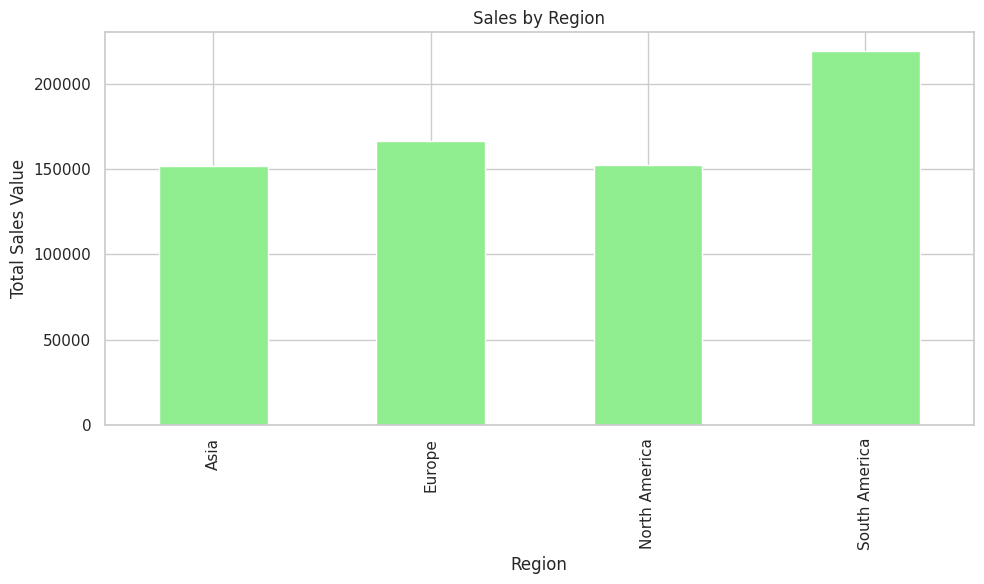

In [29]:
plt.figure(figsize=(10, 6))
plt.title('Sales by Region')
region_sales.plot(kind='bar', color='lightgreen')
plt.ylabel('Total Sales Value')
plt.xlabel('Region')
plt.tight_layout()
# plt.savefig('sales_by_region.png')
plt.show()
# plt.clf()



*Monthly sales trends highlight seasonal patterns, which can help optimize inventory and promotional activities.*

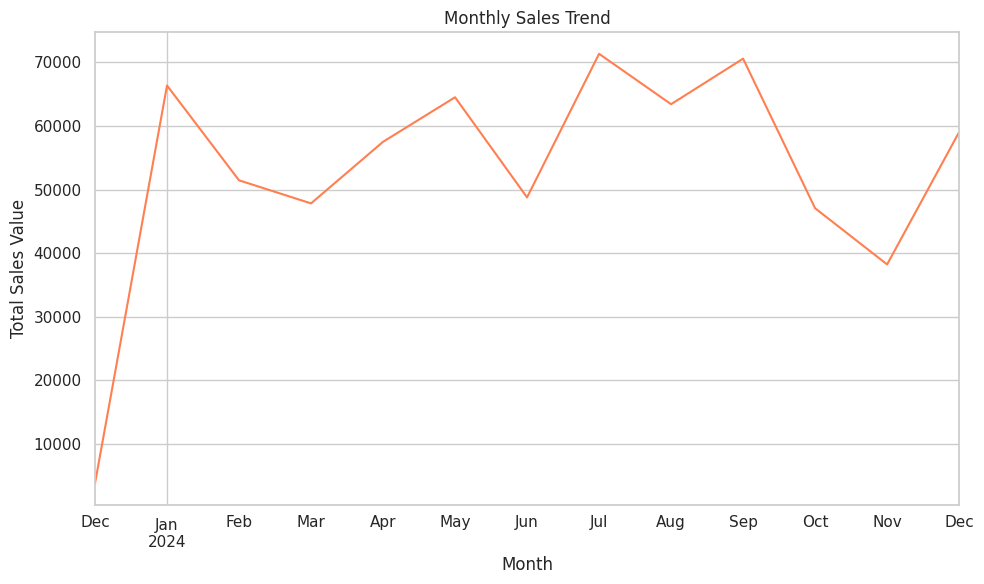

In [30]:
plt.figure(figsize=(10, 6))
plt.title('Monthly Sales Trend')
monthly_sales.plot(color='coral')
plt.ylabel('Total Sales Value')
plt.xlabel('Month')
plt.tight_layout()
# plt.savefig('monthly_sales_trend.png')
plt.show()
# plt.clf()



*Customer acquisition trends show growth over time, suggesting a positive trajectory for the business.*

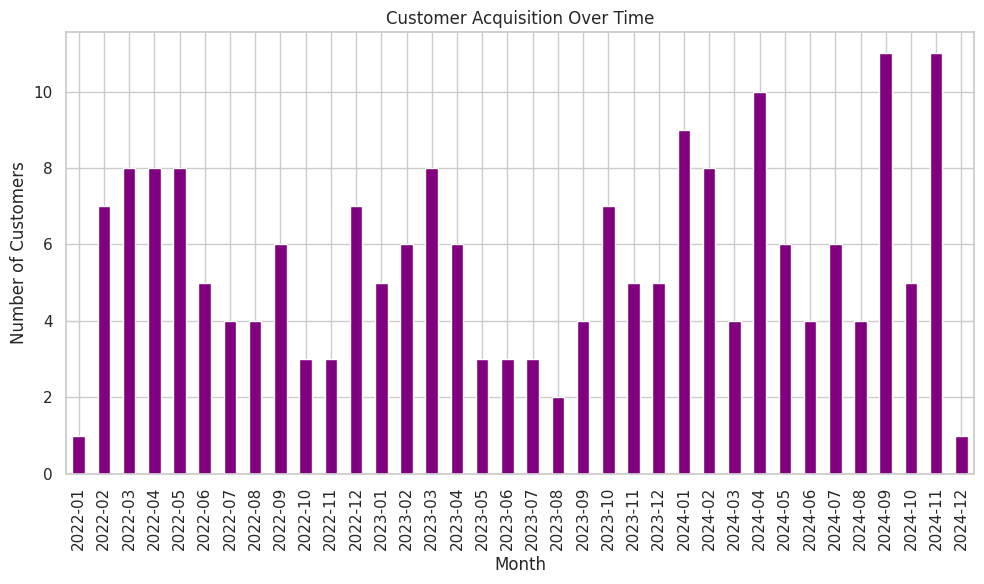

In [31]:
plt.figure(figsize=(10, 6))
plt.title('Customer Acquisition Over Time')
customer_acquisition.plot(kind='bar', color='purple')
plt.ylabel('Number of Customers')
plt.xlabel('Month')
plt.tight_layout()
# plt.savefig('customer_acquisition.png')
plt.show()
# plt.clf()

*Certain product categories dominate sales, suggesting customer preferences that can guide future product development.*

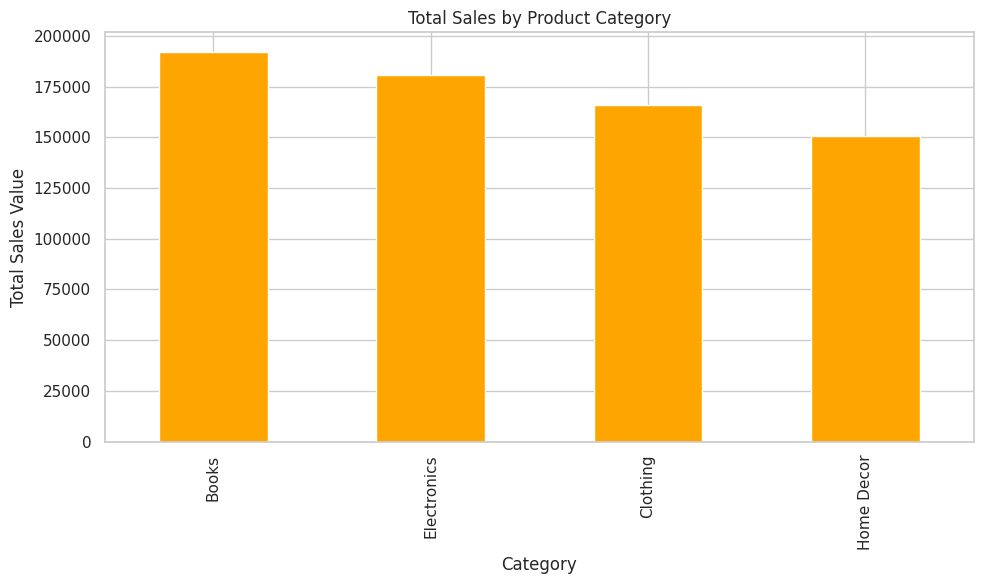

In [19]:
plt.figure(figsize=(10, 6))
plt.title('Total Sales by Product Category')
category_sales.plot(kind='bar', color='orange')
plt.ylabel('Total Sales Value')
plt.xlabel('Category')
plt.tight_layout()
# plt.savefig('category_sales.png')
plt.show()
# plt.clf()